# Lab 2
## Abdulaziz Saqer BinRuqush - 2230007229

This notebook covers:
1. Image Sampling and Quantization
2. Arithmetic Operations on Images
3. Sets and Logical Operations on Images

---
## Part 1: Image Sampling and Quantization
---

### Step 1: Import the Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Define Functions

In [2]:
def sample_image(image, factor):
    """
    Downsamples the image by the given factor.

    Args:
        image (numpy array): Original image.
        factor (int): Factor by which to downsample.

    Returns:
        numpy array: Downsampled image.
    """
    height, width = image.shape[:2]
    sampled_image = cv2.resize(image, (width // factor, height // factor),
                               interpolation=cv2.INTER_NEAREST)
    return sampled_image

In [3]:
def quantize_image(image, levels):
    """
    Reduces the number of grayscale levels in the image.

    Args:
        image (numpy array): Original image.
        levels (int): Number of grayscale levels.

    Returns:
        numpy array: Quantized image.
    """
    quantized_image = np.floor(image / (256 // levels)) * (256 // levels)
    quantized_image = quantized_image.astype(np.uint8)
    return quantized_image

In [4]:
def plot_images(original, sampled, quantized):
    """
    Plots the original, sampled, and quantized images side by side.

    Args:
        original (numpy array): Original image.
        sampled (numpy array): Sampled image.
        quantized (numpy array): Quantized image.
    """
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sampled, cmap='gray')
    plt.title('Sampled Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(quantized, cmap='gray')
    plt.title('Quantized Image')
    plt.axis('off')

    plt.show()

### Step 3: Import the Image and Set the Parameters

In [15]:
# Set image path and parameters
image_path = '/content/lena_grayscale_image.jpg'
sampling_factor = 14
quantization_levels = 9

# Load image in grayscale
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if original_image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    print(f"Image loaded successfully!")
    print(f"Image shape: {original_image.shape}")

Image loaded successfully!
Image shape: (148, 185)


In [17]:
# Sample and quantize
sampled_image = sample_image(original_image, sampling_factor)
quantized_image = quantize_image(original_image, quantization_levels)

print(f"Original image size: {original_image.shape}")
print(f"Sampled image size: {sampled_image.shape}")
print(f"Quantization levels: {quantization_levels}")

Original image size: (148, 185)
Sampled image size: (10, 13)
Quantization levels: 9


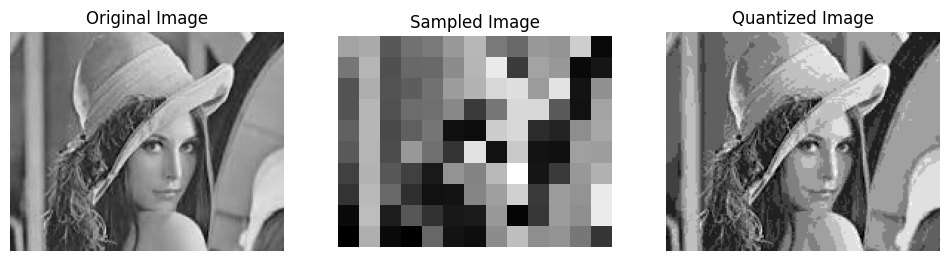

In [18]:
# Plot results
plot_images(original_image, sampled_image, quantized_image)

---
## Part 2: Arithmetic Operations
---

In [19]:
from PIL import Image

In [20]:
# Load two images
img1 = Image.open('/content/lena_grayscale_image.jpg')
img2 = Image.open('/content/cameraman.jpg')

# Resize both images to the same size
resize = (400, 400)
img1 = img1.resize(resize, Image.Resampling.LANCZOS)
img2 = img2.resize(resize, Image.Resampling.LANCZOS)

print(f"Image 1 size: {img1.size}")
print(f"Image 2 size: {img2.size}")

Image 1 size: (400, 400)
Image 2 size: (400, 400)


In [21]:
# Convert to numpy arrays
im1arr = np.asarray(img1)
im2arr = np.asarray(img2)

# Perform addition
addition = im1arr + im2arr

# Convert back to image
resultImage = Image.fromarray(addition)

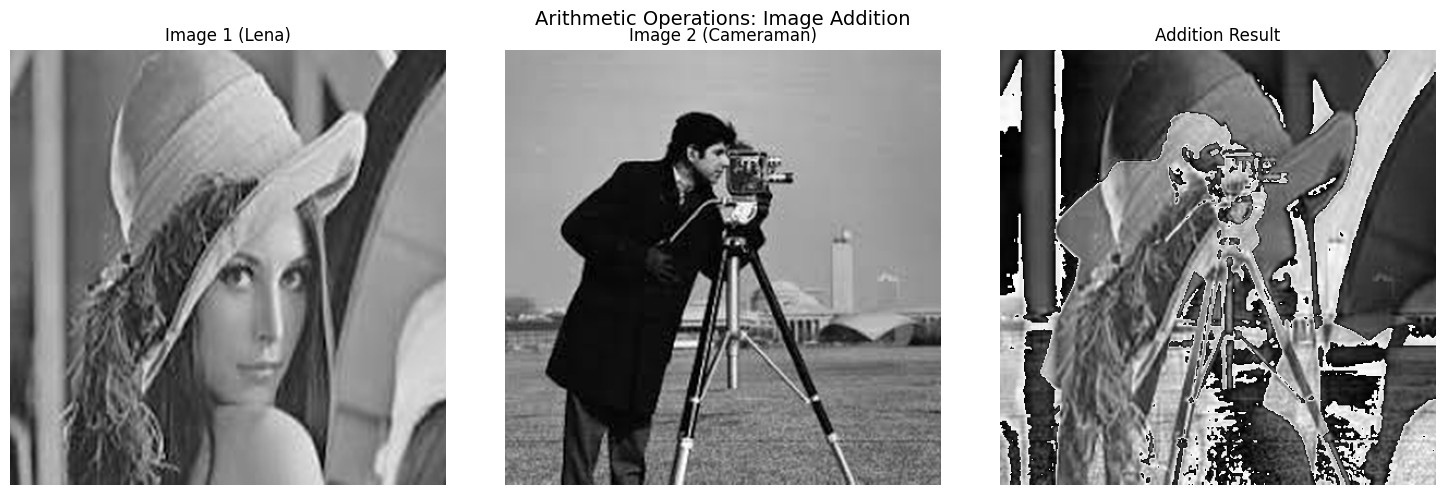

In [22]:
# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Image 1 (Lena)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('Image 2 (Cameraman)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(resultImage, cmap='gray')
plt.title('Addition Result')
plt.axis('off')

plt.suptitle('Arithmetic Operations: Image Addition', fontsize=14)
plt.tight_layout()
plt.show()

---
## Part 3: Sets and Logical Operations
---

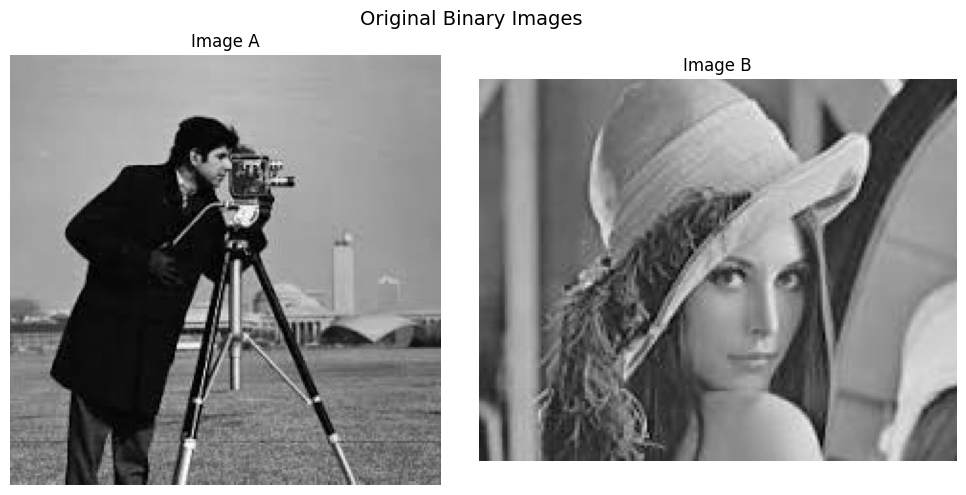

In [23]:
# Load binary images A and B
img3 = Image.open('/content/cameraman.jpg')
img4 = Image.open('/content/lena_grayscale_image.jpg')

# Display original images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img3, cmap='gray')
plt.title('Image A')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img4, cmap='gray')
plt.title('Image B')
plt.axis('off')

plt.suptitle('Original Binary Images', fontsize=14)
plt.tight_layout()
plt.show()

In [24]:
# Resize images
resize = (400, 400)
img3 = img3.resize(resize, Image.Resampling.LANCZOS)
img4 = img4.resize(resize, Image.Resampling.LANCZOS)

# Convert to numpy arrays
im3arr = np.asarray(img3)
im4arr = np.asarray(img4)

print(f"Image A shape: {im3arr.shape}")
print(f"Image B shape: {im4arr.shape}")

Image A shape: (400, 400, 3)
Image B shape: (400, 400, 3)


In [25]:
# Perform Union (OR) operation
union = im4arr | im3arr

# Convert back to image
resultImage2 = Image.fromarray(union)

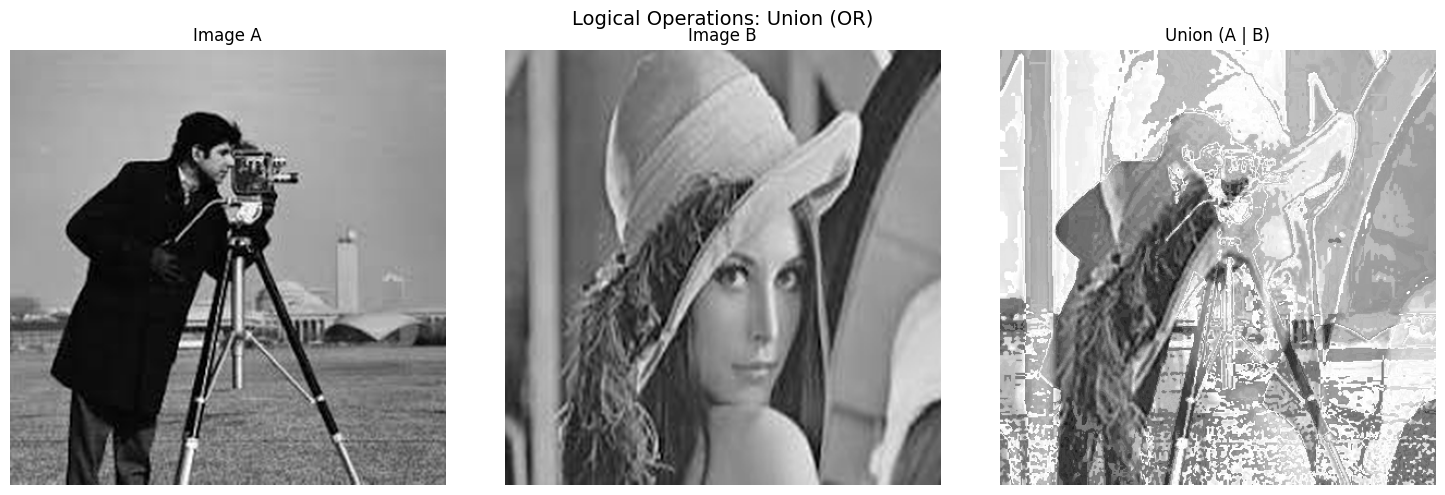

In [26]:
# Display the Union result
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img3, cmap='gray')
plt.title('Image A')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img4, cmap='gray')
plt.title('Image B')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(resultImage2, cmap='gray')
plt.title('Union (A | B)')
plt.axis('off')

plt.suptitle('Logical Operations: Union (OR)', fontsize=14)
plt.tight_layout()
plt.show()

---
## Additional Logical Operations (Bonus)
---

In [27]:
# Perform additional logical operations
intersection = im3arr & im4arr  # AND operation
difference = im3arr & ~im4arr   # A - B (A AND NOT B)
xor_result = im3arr ^ im4arr    # XOR operation

# Convert to images
intersection_img = Image.fromarray(intersection)
difference_img = Image.fromarray(difference.astype(np.uint8))
xor_img = Image.fromarray(xor_result)

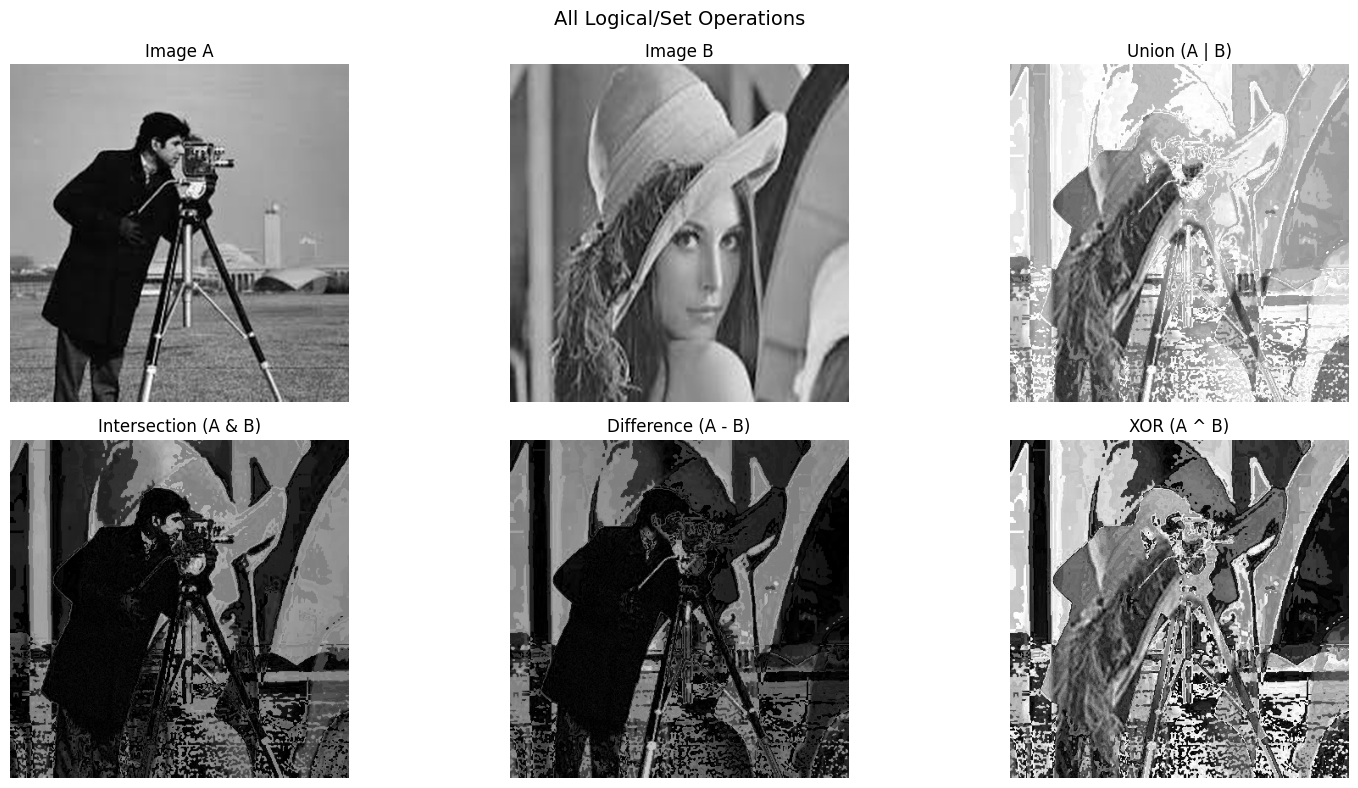

In [28]:
# Display all logical operations
plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
plt.imshow(img3, cmap='gray')
plt.title('Image A')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img4, cmap='gray')
plt.title('Image B')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(resultImage2, cmap='gray')
plt.title('Union (A | B)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(intersection_img, cmap='gray')
plt.title('Intersection (A & B)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(difference_img, cmap='gray')
plt.title('Difference (A - B)')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(xor_img, cmap='gray')
plt.title('XOR (A ^ B)')
plt.axis('off')

plt.suptitle('All Logical/Set Operations', fontsize=14)
plt.tight_layout()
plt.show()